In [144]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Diabetes ##

In [145]:
df=pd.read_csv(r'diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [146]:
df.shape

(768, 9)

In [147]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

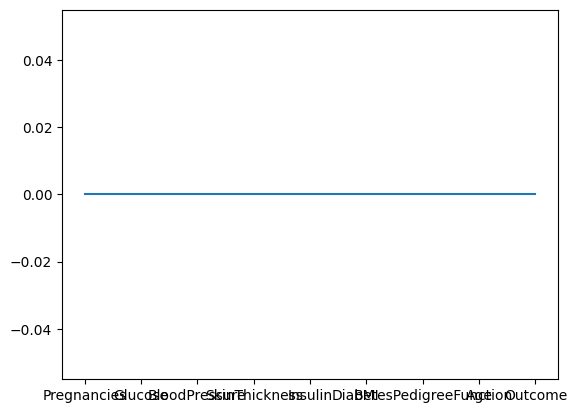

In [148]:
sns.lineplot(df.isnull().sum())

<Axes: xlabel='Outcome', ylabel='count'>

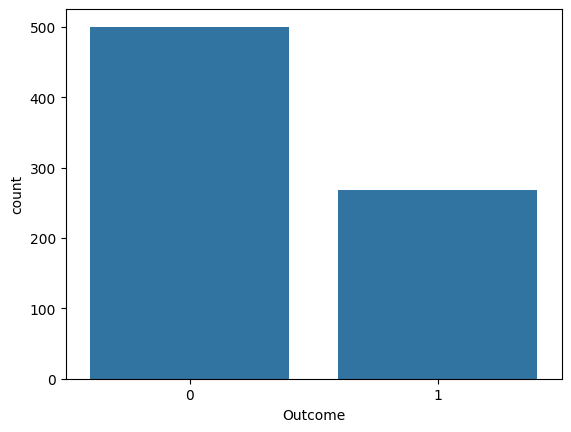

In [149]:
sns.countplot(x='Outcome',data=df)

In [150]:
df.isnull().sum().sum()

0

In [151]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [152]:
x=df.drop('Outcome',axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [153]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [155]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [156]:
y_train

334    0
139    0
485    1
547    0
18     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 537, dtype: int64

In [157]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
619,0,119,0,0,0,32.4,0.141,24
198,4,109,64,44,99,34.8,0.905,26
538,0,127,80,37,210,36.3,0.804,23
329,6,105,70,32,68,30.8,0.122,37


In [158]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
619    1
198    1
538    0
329    0
302    0
Name: Outcome, Length: 231, dtype: int64

In [159]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5)
dts.fit(x_train,y_train)
y_pred=dts.predict(x_test)
acc_dts=accuracy_score(y_pred,y_test)
acc_dts

0.7705627705627706

In [160]:
import pickle
filename = 'DecisionTreeClassifier(diabetes).sav'
pickle.dump(dts, open(filename, 'wb'))

In [161]:
model = pickle.load(open(filename, 'rb'))

In [162]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       168
           1       0.56      0.71      0.63        63

    accuracy                           0.77       231
   macro avg       0.72      0.75      0.73       231
weighted avg       0.79      0.77      0.78       231



In [163]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(random_state=52,n_estimators = 50 )
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
acc_adb=accuracy_score(y_pred,y_test)
acc_adb

0.7445887445887446

In [164]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       152
           1       0.62      0.63      0.63        79

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



In [165]:
import xgboost as xgb
xgs = xgb.XGBClassifier()
xgs.fit(x_train,y_train)
y_pred=xgs.predict(x_test)
acc_xgs=accuracy_score(y_pred,y_test)
acc_xgs

C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

0.7272727272727273

In [166]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       144
           1       0.65      0.60      0.62        87

    accuracy                           0.73       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.72      0.73      0.72       231



In [167]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1)
catboost_model.fit(x_train, y_train)
y_pred_catboost = catboost_model.predict(x_test)
acc_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy with CatBoost:", acc_catboost)

0:	learn: 0.6326676	total: 3.11ms	remaining: 1.55s
1:	learn: 0.5982969	total: 5.78ms	remaining: 1.44s
2:	learn: 0.5686640	total: 9.07ms	remaining: 1.5s
3:	learn: 0.5378063	total: 12.1ms	remaining: 1.5s
4:	learn: 0.5143858	total: 15.9ms	remaining: 1.57s
5:	learn: 0.4912764	total: 20.9ms	remaining: 1.72s
6:	learn: 0.4701889	total: 24.2ms	remaining: 1.7s
7:	learn: 0.4553765	total: 26.8ms	remaining: 1.65s
8:	learn: 0.4411082	total: 30.6ms	remaining: 1.67s
9:	learn: 0.4322133	total: 33.5ms	remaining: 1.64s
10:	learn: 0.4202205	total: 35.9ms	remaining: 1.6s
11:	learn: 0.4124830	total: 38.7ms	remaining: 1.57s
12:	learn: 0.4039663	total: 41.2ms	remaining: 1.54s
13:	learn: 0.3982691	total: 44ms	remaining: 1.53s
14:	learn: 0.3885476	total: 48.1ms	remaining: 1.55s
15:	learn: 0.3796994	total: 50.7ms	remaining: 1.53s
16:	learn: 0.3727551	total: 53.9ms	remaining: 1.53s
17:	learn: 0.3687779	total: 56.3ms	remaining: 1.51s
18:	learn: 0.3646168	total: 59.3ms	remaining: 1.5s
19:	learn: 0.3600789	total: 6

358:	learn: 0.0273588	total: 1.4s	remaining: 549ms
359:	learn: 0.0272732	total: 1.4s	remaining: 545ms
360:	learn: 0.0270991	total: 1.42s	remaining: 546ms
361:	learn: 0.0269810	total: 1.42s	remaining: 541ms
362:	learn: 0.0269771	total: 1.43s	remaining: 538ms
363:	learn: 0.0268271	total: 1.43s	remaining: 534ms
364:	learn: 0.0268192	total: 1.43s	remaining: 530ms
365:	learn: 0.0266815	total: 1.44s	remaining: 526ms
366:	learn: 0.0266521	total: 1.45s	remaining: 525ms
367:	learn: 0.0265742	total: 1.45s	remaining: 521ms
368:	learn: 0.0265650	total: 1.46s	remaining: 517ms
369:	learn: 0.0263722	total: 1.46s	remaining: 514ms
370:	learn: 0.0263395	total: 1.47s	remaining: 510ms
371:	learn: 0.0262107	total: 1.47s	remaining: 506ms
372:	learn: 0.0261369	total: 1.47s	remaining: 502ms
373:	learn: 0.0260903	total: 1.48s	remaining: 497ms
374:	learn: 0.0260844	total: 1.48s	remaining: 494ms
375:	learn: 0.0258843	total: 1.48s	remaining: 489ms
376:	learn: 0.0256830	total: 1.49s	remaining: 485ms
377:	learn: 0.

In [168]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)),
    ('adaboost', AdaBoostClassifier(random_state=52, n_estimators=50))
]
meta_classifier = DecisionTreeClassifier()
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)
stacking_classifier.fit(x_train, y_train)
y_pred_stacking = stacking_classifier.predict(x_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy with Stacking Classifier:", acc_stacking)

Accuracy with Stacking Classifier: 0.6623376623376623


In [169]:
abc=[1,	95,	60,	18,	58,	23.9,	0.260,	22]
result=dts.predict([abc])
result=result[0]
if result==0:
    print('The Person has NO-Diabetes')
else:
    print('The Person has Diabetes')

The Person has NO-Diabetes


C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [170]:
abc=[10,	101,	86,	37,	0,	45.6,	1.136,	38]
result=dts.predict([abc])
result=result[0]
if result==0:
    print('The Person has NO-Diabetes')
else:
    print('The Person has Diabetes')

The Person has Diabetes


C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Liver ##

In [171]:
import pandas as pd

In [172]:
df2=pd.read_csv('indian_liver_patient.csv')
df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [173]:
df2.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [174]:
df2.shape

(583, 11)

In [175]:
df2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [176]:
df2.isnull().sum().sum()

4

In [177]:
df2 = df2.dropna()

In [178]:
df2.isnull().sum().sum()

0

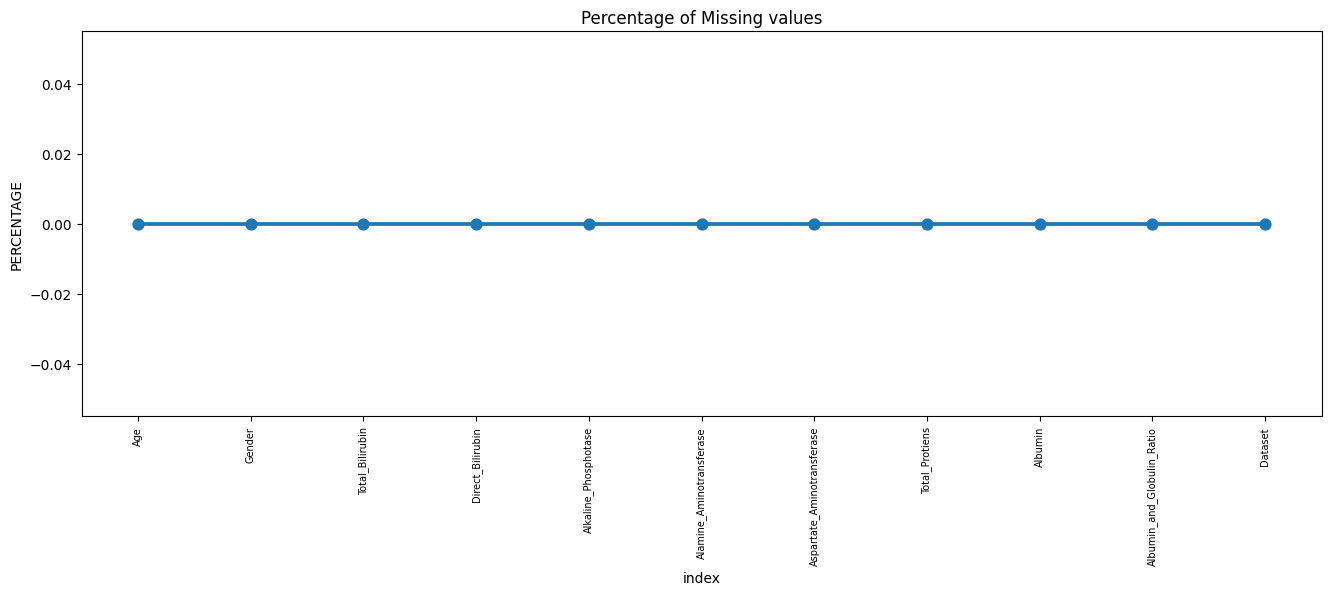

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df2.isnull().sum())*100/df2.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: xlabel='Dataset', ylabel='count'>

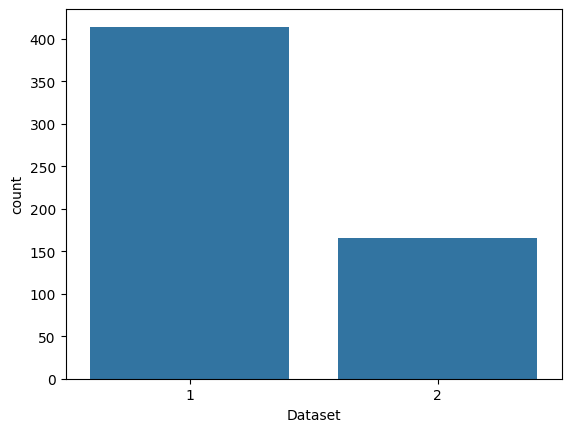

In [180]:
import seaborn as sns
sns.countplot(x='Dataset',data=df2)

In [181]:
df2.Dataset.value_counts()

Dataset
1    414
2    165
Name: count, dtype: int64

In [182]:
df2['Dataset'] = df2['Dataset'].replace({1: 0, 2: 1})

In [183]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(le)

LabelEncoder()


In [184]:
df2['Gender']=le.fit_transform(df2['Gender'])

In [185]:
df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [186]:
df2['Dataset'].value_counts()

Dataset
0    414
1    165
Name: count, dtype: int64

In [187]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Preprocess Data for Machine Learning Development
X = df2.drop(['Dataset'], axis = 1)
y = df2['Dataset']


over_strategy = {0 : 1000, 1 : 1000}
under_strategy = {0 : 1000, 1 : 1000}

oversample = SMOTE(sampling_strategy = over_strategy)
undersample = RandomUnderSampler(sampling_strategy = under_strategy)

X_final,y = oversample.fit_resample(X,y)
X_final,y = undersample.fit_resample(X_final, y)


X_train,X_test,y_train,y_test = train_test_split(X_final,y,random_state = 10, test_size = 0.2)

In [188]:
x=df2.drop('Dataset',axis=1)
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [189]:
y=df2['Dataset']
y

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 579, dtype: int64

In [190]:
X_train

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
858,34,1,1.208272,0.363309,482,103,83,6.679853,3.171581,0.881654
28,20,1,1.100000,0.500000,128,20,30,3.900000,1.900000,0.950000
67,37,1,1.800000,0.800000,215,53,58,6.400000,3.800000,1.400000
1184,11,1,0.825978,0.171634,593,29,35,7.065418,4.153067,1.381968
1320,59,1,0.688968,0.144484,186,19,21,5.977580,3.211032,1.122242
...,...,...,...,...,...,...,...,...,...,...
1242,60,1,1.135168,0.440561,173,50,97,5.386516,3.037865,1.245955
140,60,1,0.600000,0.100000,186,20,21,6.200000,3.300000,1.100000
1060,53,0,4.103466,2.308595,355,59,34,6.465157,2.843438,0.740573
1997,59,0,1.274355,0.615061,164,43,63,7.273406,4.307056,1.459294


In [191]:
y_train

858     0
28      1
67      0
1184    1
1320    1
       ..
1242    1
140     1
1060    0
1997    1
1919    1
Name: Dataset, Length: 1600, dtype: int64

In [192]:
X_test

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
1044,19,1,0.879882,0.239941,221,49,64,6.620414,3.640532,1.180177
1744,57,1,1.708853,0.863716,175,41,53,5.520321,2.992890,1.166183
1679,42,1,0.700000,0.200000,177,23,50,5.967697,3.020005,0.990771
242,54,1,0.800000,0.200000,218,20,19,6.300000,2.500000,0.600000
1506,13,1,0.968642,0.451481,330,17,33,6.786975,2.969815,0.748519
...,...,...,...,...,...,...,...,...,...,...
561,43,1,22.500000,11.800000,143,22,143,6.600000,2.100000,0.460000
1753,37,0,0.646381,0.123191,163,23,35,5.923191,2.737666,0.807238
1939,44,1,1.275026,0.516684,185,53,71,6.797167,3.877754,1.305561
281,18,1,0.900000,0.300000,300,30,48,8.000000,4.000000,1.000000


In [193]:
y_test

1044    0
1744    1
1679    1
242     0
1506    1
       ..
561     0
1753    1
1939    1
281     0
1873    1
Name: Dataset, Length: 400, dtype: int64

In [194]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier( max_depth = 5)
dts.fit(X_train,y_train)
y_pred=dts.predict(X_test)
acc_dt=accuracy_score(y_pred,y_test)
acc_dt

0.77

In [195]:
import pickle
filename = 'DecisionTreeClassifier(liver).sav'
pickle.dump(dts, open(filename, 'wb'))

In [196]:
model = pickle.load(open(filename, 'rb'))

In [197]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.87      0.74       153
           1       0.90      0.71      0.79       247

    accuracy                           0.77       400
   macro avg       0.77      0.79      0.77       400
weighted avg       0.80      0.77      0.77       400



In [198]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
ads=AdaBoostClassifier(random_state=52,n_estimators = 50 )
ads.fit(X_train,y_train)
y_pred=ads.predict(X_test)
acc_ad=accuracy_score(y_pred,y_test)
acc_ad

0.7825

In [199]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       168
           1       0.87      0.73      0.80       232

    accuracy                           0.78       400
   macro avg       0.78      0.79      0.78       400
weighted avg       0.80      0.78      0.78       400



In [200]:
import xgboost as xgb
xgs = xgb.XGBClassifier()
xgs.fit(X_train, y_train)
y_pred = xgs.predict(X_test)
acc_xg = accuracy_score(y_pred, y_test)
acc_xg

C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

0.915

In [201]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       185
           1       0.96      0.87      0.92       215

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.91       400
weighted avg       0.92      0.92      0.92       400



In [202]:
import pickle
filename = 'XGBClassifier(liver).sav'
pickle.dump(xgs, open(filename, 'wb'))

In [203]:
model = pickle.load(open(filename, 'rb'))

In [204]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
catboost_model = CatBoostClassifier(iterations=50, random_seed=52)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
acc_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy with CatBoost:", acc_catboost)

Learning rate set to 0.196398
0:	learn: 0.6497429	total: 7.94ms	remaining: 389ms
1:	learn: 0.6151670	total: 10.8ms	remaining: 259ms
2:	learn: 0.5904361	total: 14.1ms	remaining: 220ms
3:	learn: 0.5701053	total: 16.4ms	remaining: 188ms
4:	learn: 0.5499656	total: 20.8ms	remaining: 187ms
5:	learn: 0.5355712	total: 23.3ms	remaining: 171ms
6:	learn: 0.5233936	total: 26.9ms	remaining: 165ms
7:	learn: 0.5133888	total: 29.3ms	remaining: 154ms
8:	learn: 0.5036433	total: 32.1ms	remaining: 146ms
9:	learn: 0.4952840	total: 35.5ms	remaining: 142ms
10:	learn: 0.4856633	total: 38.9ms	remaining: 138ms
11:	learn: 0.4759996	total: 42.4ms	remaining: 134ms
12:	learn: 0.4699290	total: 44.6ms	remaining: 127ms
13:	learn: 0.4647802	total: 47.8ms	remaining: 123ms
14:	learn: 0.4593732	total: 51.6ms	remaining: 120ms
15:	learn: 0.4545927	total: 54.8ms	remaining: 116ms
16:	learn: 0.4490403	total: 57.3ms	remaining: 111ms
17:	learn: 0.4464450	total: 60.5ms	remaining: 108ms
18:	learn: 0.4434008	total: 63.7ms	remaining

In [205]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
base_classifiers = [
    ('adaboost', AdaBoostClassifier(random_state=52, n_estimators=50)),
    ('catboost', CatBoostClassifier(iterations=50, random_seed=52))
]
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=DecisionTreeClassifier(max_depth=5)
)
stacking_classifier.fit(X_train, y_train)
y_pred_stacking = stacking_classifier.predict(X_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy with Stacking Classifier:", acc_stacking)

Learning rate set to 0.196398
0:	learn: 0.6497429	total: 2ms	remaining: 97.9ms
1:	learn: 0.6151670	total: 3.92ms	remaining: 94.2ms
2:	learn: 0.5904361	total: 5.59ms	remaining: 87.6ms
3:	learn: 0.5701053	total: 7.21ms	remaining: 82.9ms
4:	learn: 0.5499656	total: 9.93ms	remaining: 89.4ms
5:	learn: 0.5355712	total: 11.8ms	remaining: 86.4ms
6:	learn: 0.5233936	total: 13.5ms	remaining: 82.9ms
7:	learn: 0.5133888	total: 15.1ms	remaining: 79.3ms
8:	learn: 0.5036433	total: 16.8ms	remaining: 76.4ms
9:	learn: 0.4952840	total: 18.6ms	remaining: 74.5ms
10:	learn: 0.4856633	total: 20.4ms	remaining: 72.2ms
11:	learn: 0.4759996	total: 22.2ms	remaining: 70.2ms
12:	learn: 0.4699290	total: 24ms	remaining: 68.4ms
13:	learn: 0.4647802	total: 26.7ms	remaining: 68.6ms
14:	learn: 0.4593732	total: 28.8ms	remaining: 67.2ms
15:	learn: 0.4545927	total: 30.5ms	remaining: 64.8ms
16:	learn: 0.4490403	total: 32.2ms	remaining: 62.5ms
17:	learn: 0.4464450	total: 33.8ms	remaining: 60.1ms
18:	learn: 0.4434008	total: 35.

In [206]:
abc=[59,	1,	19.344371,	10.643388,	983,	48,	40,	6.931558,	3.331558,	0.900000]
result=dts.predict([abc])
result=result[0]
if result==0:
    print('The Person has No-Liver Disease')
else:
    print('The Person has Liver Disease')

The Person has No-Liver Disease


C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [207]:
abc=[31,	0,	0.729486,	0.143162,	182,	37,	31,	7.072648,	4.358973,	1.572648]
result=dts.predict([abc])
result=result[0]
if result==0:
    print('The Person has No-Liver Disease')
else:
    print('The Person has Liver Disease')

The Person has Liver Disease


C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Kidney ##

In [208]:
df3=pd.read_csv('kidney_disease.csv')
df3.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [209]:
df3.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [210]:
df3.shape

(400, 26)

In [211]:
df3.classification.value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [212]:
df3.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [213]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [214]:
#converting categorial details to numericals
cols = ["rbc","pc","pcc","ba","pcv","wc","rc","htn","dm","cad","appet","pe","ane","classification"]

for col in cols:
    df3[col] = le.fit_transform(df3[col])
    print(le.classes_)

['abnormal' 'normal' nan]
['abnormal' 'normal' nan]
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['\t43' '\t?' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25'
 '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39'
 '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53'
 '54' '9' nan]
['\t6200' '\t8400' '\t?' '10200' '10300' '10400' '10500' '10700' '10800'
 '10900' '11000' '11200' '11300' '11400' '11500' '11800' '11900' '12000'
 '12100' '12200' '12300' '12400' '12500' '12700' '12800' '13200' '13600'
 '14600' '14900' '15200' '15700' '16300' '16700' '18900' '19100' '21600'
 '2200' '2600' '26400' '3800' '4100' '4200' '4300' '4500' '4700' '4900'
 '5000' '5100' '5200' '5300' '5400' '5500' '5600' '5700' '5800' '5900'
 '6000' '6200' '6300' '6400' '6500' '6600' '6700' '6800' '6900' '7000'
 '7100' '7200' '7300' '7400' '7500' '7700' '7800' '7900' '8000' '8100'
 '8200' '8300' '8400' '8500' '8600' '8800' '9000' '9100' '9200' '9300'
 '9400' '95

In [215]:
df3.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int32
wc                  int32
rc                  int32
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object

In [216]:
df3.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,26,56,49,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,49,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0


In [217]:
df3.classification.value_counts()

classification
0    248
2    150
1      2
Name: count, dtype: int64

In [218]:
df3.isnull().sum()

id                 0
age                9
bp                12
sg                47
al                46
su                49
rbc                0
pc                 0
pcc                0
ba                 0
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

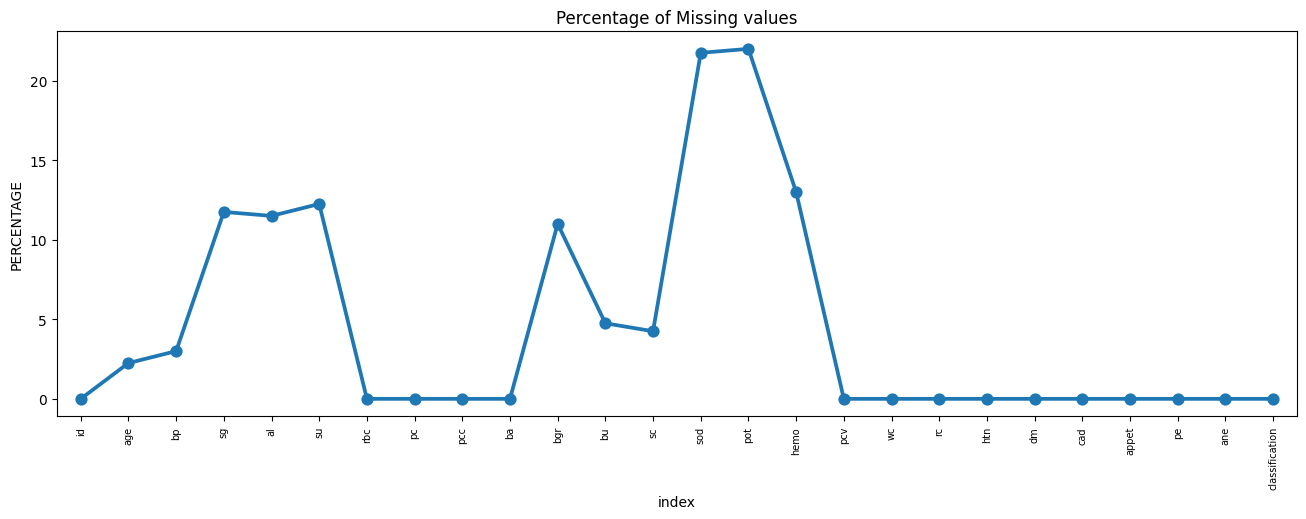

In [219]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df3.isnull().sum())*100/df3.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [220]:
for col in df3.columns:
    df3[col].fillna(df3[col].median(),inplace=True)
df3.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,26,56,49,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,49,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0


In [221]:
df3.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [222]:
df3.isnull().sum().sum()

0

In [223]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, svd_solver='full')

In [224]:
pca.fit(df3)

PCA(n_components=10, svd_solver='full')

In [225]:
x_pca= pca.transform(df3)

In [226]:
x_pca.shape

(400, 10)

In [227]:
x= pd.DataFrame(x_pca, columns=['age', 'bp', 'sg', 'sod', 'pcv', 'wc', 'htn', 'appet','sc', 'bu'])

In [228]:
x.head()

,age,bp,sg,sod,pcv,wc,htn,appet,sc,bu
0,178.483763,-80.227736,-50.277789,2.700479,3.194856,0.834227,-0.542029,-3.867273,-5.958791,-0.124719
1,172.316188,-81.249463,-70.433853,17.702464,48.464241,-21.261755,-5.723524,-2.501049,7.724866,0.891974
2,266.460781,209.102061,-40.602129,-1.952014,7.446393,-6.887312,10.034757,-2.588611,12.966545,0.390877
3,178.228757,-83.422869,-26.251883,15.340095,2.521700,-4.553864,-21.446992,17.914727,-3.830656,-7.548772
4,169.347454,-92.865084,-57.288256,10.148791,-3.337106,3.447092,-9.515415,-4.608308,-1.465283,0.720532


In [229]:
x

,age,bp,sg,sod,pcv,wc,htn,appet,sc,bu
0,178.483763,-80.227736,-50.277789,2.700479,3.194856,0.834227,-0.542029,-3.867273,-5.958791,-0.124719
1,172.316188,-81.249463,-70.433853,17.702464,48.464241,-21.261755,-5.723524,-2.501049,7.724866,0.891974
2,266.460781,209.102061,-40.602129,-1.952014,7.446393,-6.887312,10.034757,-2.588611,12.966545,0.390877
3,178.228757,-83.422869,-26.251883,15.340095,2.521700,-4.553864,-21.446992,17.914727,-3.830656,-7.548772
4,169.347454,-92.865084,-57.288256,10.148791,-3.337106,3.447092,-9.515415,-4.608308,-1.465283,0.720532
...,...,...,...,...,...,...,...,...,...,...
395,-187.502508,52.003352,21.746925,-3.894274,-8.291132,7.107493,0.898428,-8.476041,-3.316065,1.750876
396,-210.375369,-10.384458,2.830240,-14.821977,3.943537,-0.808174,3.762491,2.858337,-2.406176,-0.428105
397,-205.462180,13.153671,-1.662862,-0.401264,30.479113,16.399598,-4.349890,4.598562,-2.874932,-1.294834
398,-199.203089,26.113268,20.208365,-10.720474,32.227702,-5.206276,-5.302198,5.767476,-1.618173,-2.615591


In [230]:
x.to_csv('finaldata.csv')

In [231]:
y=df3['classification']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    2
396    2
397    2
398    2
399    2
Name: classification, Length: 400, dtype: int32

In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [233]:
x_train

,age,bp,sg,sod,pcv,wc,htn,appet,sc,bu
157,32.057813,-33.459226,-18.772564,-1.258825,-14.174187,-3.894772,-16.742819,-1.798153,-6.439826,-0.705057
109,109.694212,57.547752,-26.721386,-28.146472,6.906783,-11.786393,9.688777,0.077449,-6.695588,-0.914007
17,167.875447,-83.872928,-1.482382,-27.310663,10.820323,-3.660885,14.560610,-3.034030,-8.390952,0.182327
347,-155.587079,7.386458,-9.851290,-5.220664,4.281694,-9.021270,-7.608736,-2.496762,2.694727,2.025337
24,158.951526,-73.692472,-31.735850,-1.470540,4.644745,23.806061,-4.904000,3.040115,-5.593662,-4.021999
...,...,...,...,...,...,...,...,...,...,...
71,130.691668,-20.193714,19.911283,43.501699,9.646965,-15.960199,-16.244233,-11.228855,-0.857129,0.910483
106,82.321919,-82.114428,48.643156,1.820270,3.533578,9.366318,6.772530,7.624053,26.815314,-3.308149
270,-80.608222,-12.695383,-12.497739,-0.945281,21.470160,13.083306,-7.782400,-6.216430,0.062923,1.778283
348,-159.713553,-0.975999,-16.059501,-7.215971,6.787093,9.233259,4.691866,-3.150914,6.554953,1.796211


In [234]:
y_train

157    0
109    0
17     0
347    2
24     0
      ..
71     0
106    0
270    2
348    2
102    0
Name: classification, Length: 280, dtype: int32

In [235]:
x_test

,age,bp,sg,sod,pcv,wc,htn,appet,sc,bu
209,-19.909686,-21.457485,-16.419974,-2.328013,33.778431,-3.252507,8.844307,1.941038,-4.558778,-1.279523
280,-94.694265,-26.288080,-11.678591,-11.149424,-1.550744,7.118116,0.303804,-3.748188,-7.781367,0.648311
33,157.377746,-52.835115,-28.126929,-21.529397,-8.993932,18.095288,7.817130,-1.686984,14.722929,-0.268345
210,35.415993,106.726243,74.717149,-27.220226,-5.562259,25.656061,-14.807440,-1.416930,9.044084,5.187544
93,150.577889,113.218067,17.533223,5.270839,-17.750474,18.534875,-7.550826,-8.155764,-3.883737,1.763776
...,...,...,...,...,...,...,...,...,...,...
60,132.901346,-44.305336,-14.840734,-27.258104,-10.978974,3.108264,19.149627,-0.319419,-7.605783,-0.522805
79,118.293386,-14.748912,-15.415186,52.719078,-0.627640,-4.844475,12.233551,-2.082729,-0.636745,-0.425402
285,-101.116106,-22.635444,-21.463012,14.130026,-18.179589,-7.737017,4.234255,6.791065,5.973138,-1.401148
305,-110.715162,8.560514,-16.636354,-17.575137,3.160169,11.630171,-9.267998,1.602919,1.068139,-0.169210


In [236]:
y_test

209    0
280    2
33     0
210    0
93     0
      ..
60     0
79     0
285    2
305    2
281    2
Name: classification, Length: 120, dtype: int32

In [237]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier(random_state = 100,splitter='random', max_depth = 5, min_samples_leaf = 5)
dts.fit(x_train,y_train)
y_pred=dts.predict(x_test)
acc_kid=accuracy_score(y_pred,y_test)
acc_kid

0.9833333333333333

In [238]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           2       0.98      0.98      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [239]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(random_state=52,n_estimators = 50 )
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
acc_kid=accuracy_score(y_pred,y_test)
acc_kid

0.9916666666666667

In [240]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           2       0.98      1.00      0.99        43

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [241]:
import xgboost as xgb
xgs = xgb.XGBClassifier()
xgs.fit(x_train,y_train)
y_pred=xgs.predict(x_test)
acc_kid=accuracy_score(y_pred,y_test)
acc_kid

C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

1.0

In [242]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           2       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [243]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           2       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [244]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
catboost_model = CatBoostClassifier(
    random_seed=100,
    iterations=500,  # You can adjust the number of iterations
    depth=5,
    min_child_samples=5,
    verbose=0  # Set verbose to 0 for less output during training
)
catboost_model.fit(x_train, y_train)
y_pred_catboost = catboost_model.predict(x_test)
acc_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy with CatBoost:", acc_catboost)

Accuracy with CatBoost: 0.9916666666666667


In [245]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
base_classifiers = [
    ('xgboost', xgb.XGBClassifier()),
    ('catboost', CatBoostClassifier(
        random_seed=100,
        iterations=500,
        depth=5,
        min_child_samples=5,
        verbose=0
    ))
]
meta_classifier = xgb.XGBClassifier()
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)
stacking_classifier.fit(x_train, y_train)
y_pred_stacking = stacking_classifier.predict(x_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy with Stacking Classifier:", acc_stacking)

C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

Accuracy with Stacking Classifier: 1.0


C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

In [246]:
abc=[178.483763,	-80.227736,	-50.277789,	2.700479,	3.194856,	0.834227,	-0.542029,	-3.867273,	-5.958791,	-0.124719]
result=dts.predict([abc])
result=result[0]
if result==0:
    print('The Person has No-Kidney Disease')
elif result==1:
    print("There is a chance to get kidney disease")
else:
    print('The Person has Kidney Disease')

The Person has No-Kidney Disease


C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [247]:
abc=[-155.587079,	7.386458,	-9.851290,	-5.220664,	4.281694,	-9.021270,	-7.608736,	-2.496762,	2.694727,	2.025337]
result=dts.predict([abc])
result=result[0]
if result==0:
    print('The Person has No-Kidney Disease')
elif result==1:
    print("There is a chance to get kidney disease")
else:
    print('The Person has Kidney Disease')

The Person has Kidney Disease


C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# $$Breast Cancer$$

In [248]:
df1=pd.read_csv(r'breast-cancer.csv')

In [249]:
#Let's print the first 5 records of the data set
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [250]:
#Let's print the last 5 records of the dataset 
df1.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [251]:
#Let's print the column name
df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [252]:
# shape of the dataset
df1.shape

(569, 32)

In [253]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [254]:
#Let's print the total number of duplicated value
df1.duplicated().sum()

0

In [255]:
#Let's print the unique values in our dataset
df1.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [256]:
#Let's print the data types in our data
df1.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [257]:
#descriptive statistics summary
df1.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [258]:
#Let's get the overall information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

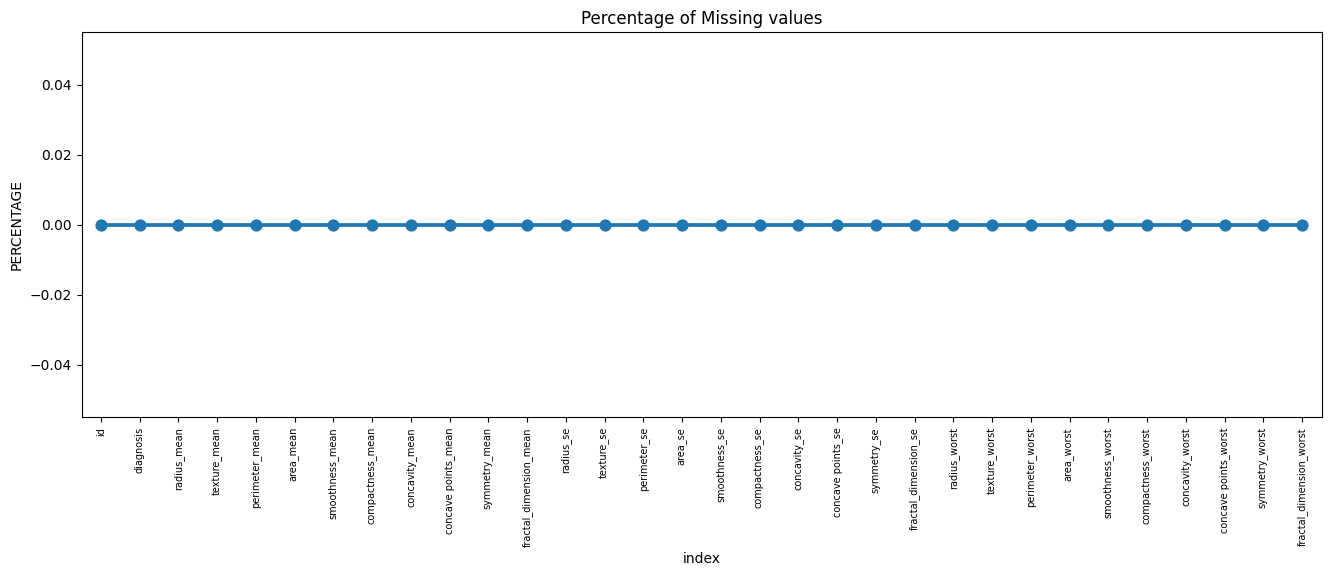

In [259]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df1.isnull().sum())*100/df1.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [260]:
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [261]:
df1['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [262]:
df1=df1[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'smoothness_se', 'symmetry_se', 'symmetry_worst']]

In [263]:
df1.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003,0.4601
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389,0.2750
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250,0.3613
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963,0.6638
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756,0.2364


In [264]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(le)

LabelEncoder()


In [265]:
df1['diagnosis']=le.fit_transform(df1['diagnosis'])

C:\Users\0591\AppData\Local\Temp\ipykernel_15280\2090074044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['diagnosis']=le.fit_transform(df1['diagnosis'])


In [266]:
df1.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003,0.4601
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389,0.2750
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250,0.3613
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963,0.6638
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756,0.2364


In [267]:
df1['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [268]:
x=df1.drop('diagnosis',axis=1)
x

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756,0.2364
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.2560,0.010300,0.01114,0.2060
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,2.4630,0.005769,0.01898,0.2572
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,1.0750,0.005903,0.01318,0.2218
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,1.5950,0.006522,0.02324,0.4087


In [269]:
y=df1['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [270]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [271]:
x_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
149,13.740,17.91,0.07944,0.06376,0.1473,0.05580,0.7574,0.002838,0.01329,0.2350
124,13.370,16.39,0.07115,0.07325,0.1422,0.05823,1.1400,0.005919,0.01208,0.2048
421,14.690,13.98,0.10310,0.18360,0.2086,0.07406,1.5110,0.009976,0.02653,0.2827
195,12.910,16.33,0.07941,0.05366,0.1829,0.05667,0.9086,0.005298,0.01853,0.3024
545,13.620,23.23,0.09246,0.06747,0.1664,0.05801,1.3360,0.005868,0.02087,0.2642
...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,0.09783,0.15310,0.1902,0.08980,0.8522,0.017210,0.02541,0.2254
106,11.640,18.33,0.11420,0.10170,0.1801,0.06520,1.6570,0.008540,0.01565,0.2806
270,14.290,16.82,0.06429,0.02675,0.1508,0.05376,0.7198,0.003492,0.01536,0.2458
435,13.980,19.62,0.10600,0.11330,0.1669,0.06544,0.9533,0.005314,0.01223,0.3179


In [272]:
y_train

149    0
124    0
421    0
195    0
545    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 398, dtype: int32

In [273]:
x_test

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
204,12.470,18.60,0.09965,0.10580,0.1925,0.06373,1.0440,0.006953,0.01782,0.3014
70,18.940,21.31,0.09009,0.10290,0.1582,0.05461,0.7975,0.004444,0.01386,0.2551
131,15.460,19.48,0.10920,0.12230,0.1931,0.05796,0.7859,0.006240,0.01397,0.2837
431,12.400,17.68,0.10540,0.13160,0.1811,0.07102,1.4600,0.010000,0.02187,0.2556
540,11.540,14.44,0.09984,0.11200,0.1818,0.06782,1.7680,0.012150,0.01840,0.2329
...,...,...,...,...,...,...,...,...,...,...
69,12.780,16.49,0.09831,0.05234,0.1590,0.05653,0.8732,0.007962,0.02254,0.2383
542,14.740,25.42,0.08275,0.07214,0.1840,0.05680,1.3850,0.004775,0.01870,0.2722
176,9.904,18.06,0.09699,0.12940,0.1669,0.08116,2.2610,0.012860,0.03880,0.2614
501,13.820,24.49,0.11620,0.16810,0.2275,0.07237,1.5280,0.009680,0.02434,0.3651


In [274]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int32

In [275]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dts = DecisionTreeClassifier(random_state=5)
dts.fit(x_train,y_train)
y_pred=dts.predict(x_test)
acc= accuracy_score(y_pred,y_test)
acc

0.8771929824561403

In [276]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        95
           1       0.94      0.78      0.85        76

    accuracy                           0.88       171
   macro avg       0.89      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



In [277]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
ads=AdaBoostClassifier(random_state=52,n_estimators = 50 )
ads.fit(x_train,y_train)
y_pred=ads.predict(x_test)
acc_ads=accuracy_score(y_pred,y_test)
acc_ads

0.9298245614035088

In [278]:
import pickle
filename = 'AdaBoostClassifier(breast).sav'
pickle.dump(dts, open(filename, 'wb'))

In [279]:

model = pickle.load(open(filename, 'rb'))

In [280]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       106
           1       0.92      0.89      0.91        65

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



In [281]:
import xgboost as xgb
xgs = xgb.XGBClassifier()
xgs.fit(x_train,y_train)
y_pred=xgs.predict(x_test)
acc_xgb=accuracy_score(y_pred,y_test)
acc_xgb

C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

0.9590643274853801

In [282]:

from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       105
           1       0.97      0.92      0.95        66

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [283]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
catboost_model = CatBoostClassifier(
    random_seed=5,  # Use the same random seed as in the DecisionTreeClassifier
)
catboost_model.fit(x_train, y_train)
y_pred_catboost = catboost_model.predict(x_test)
acc_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy with CatBoost:", acc_catboost)

Learning rate set to 0.006952
0:	learn: 0.6850217	total: 5.19ms	remaining: 5.18s
1:	learn: 0.6763991	total: 12.8ms	remaining: 6.37s
2:	learn: 0.6693412	total: 16.6ms	remaining: 5.53s
3:	learn: 0.6610367	total: 19.9ms	remaining: 4.96s
4:	learn: 0.6530477	total: 26.2ms	remaining: 5.21s
5:	learn: 0.6449289	total: 30.5ms	remaining: 5.05s
6:	learn: 0.6371065	total: 34.7ms	remaining: 4.92s
7:	learn: 0.6299995	total: 38.3ms	remaining: 4.75s
8:	learn: 0.6232716	total: 44.8ms	remaining: 4.94s
9:	learn: 0.6159195	total: 49.4ms	remaining: 4.89s
10:	learn: 0.6085037	total: 53ms	remaining: 4.77s
11:	learn: 0.6005712	total: 59.1ms	remaining: 4.86s
12:	learn: 0.5937063	total: 62.7ms	remaining: 4.76s
13:	learn: 0.5866035	total: 66.1ms	remaining: 4.66s
14:	learn: 0.5805090	total: 72ms	remaining: 4.72s
15:	learn: 0.5742679	total: 76.8ms	remaining: 4.72s
16:	learn: 0.5681297	total: 84.7ms	remaining: 4.89s
17:	learn: 0.5619835	total: 91.1ms	remaining: 4.97s
18:	learn: 0.5559907	total: 95.4ms	remaining: 4.

67:	learn: 0.3480481	total: 416ms	remaining: 5.71s
68:	learn: 0.3452631	total: 429ms	remaining: 5.78s
69:	learn: 0.3430508	total: 446ms	remaining: 5.93s
70:	learn: 0.3401526	total: 454ms	remaining: 5.94s
71:	learn: 0.3367209	total: 465ms	remaining: 5.99s
72:	learn: 0.3336444	total: 474ms	remaining: 6.02s
73:	learn: 0.3310965	total: 479ms	remaining: 6s
74:	learn: 0.3284260	total: 485ms	remaining: 5.98s
75:	learn: 0.3257002	total: 493ms	remaining: 5.99s
76:	learn: 0.3233940	total: 499ms	remaining: 5.99s
77:	learn: 0.3209210	total: 506ms	remaining: 5.98s
78:	learn: 0.3184852	total: 512ms	remaining: 5.96s
79:	learn: 0.3163317	total: 519ms	remaining: 5.97s
80:	learn: 0.3138486	total: 526ms	remaining: 5.97s
81:	learn: 0.3111173	total: 531ms	remaining: 5.95s
82:	learn: 0.3090266	total: 541ms	remaining: 5.98s
83:	learn: 0.3067693	total: 548ms	remaining: 5.97s
84:	learn: 0.3049081	total: 554ms	remaining: 5.96s
85:	learn: 0.3030507	total: 564ms	remaining: 5.99s
86:	learn: 0.3005070	total: 574ms	

In [284]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# Define the base classifiers
base_classifiers = [
    ('adaboost', AdaBoostClassifier(random_state=52, n_estimators=50)),
    ('decision_tree', DecisionTreeClassifier(random_state=5))
]
meta_classifier = DecisionTreeClassifier(random_state=100)

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)
stacking_classifier.fit(x_train, y_train)
y_pred_stacking = stacking_classifier.predict(x_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy with Stacking Classifier:", acc_stacking)

Accuracy with Stacking Classifier: 0.9064327485380117


In [285]:
abc=[13.740,	17.91,	0.07944,	0.06376,	0.1473,	0.05580,	0.7574,	0.002838,	0.01329,	0.2350]
result=dts.predict([abc])
result=result[0]
if result==0:
    print("The patient is in benign(cancer-free)")
elif result==1:
    print("The patient is in Malignant(suffering with cancer)")

The patient is in benign(cancer-free)


C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [286]:
abc=[13.980,19.62,	0.10600,	0.11330,	0.1669,	0.06544,	0.9533,	0.005314,0.01223,	0.3179]
result=dts.predict([abc])
result=result[0]
if result==0:
    print("The patient is in benign(cancer-free)")
elif result==1:
    print("The patient is in Malignant(suffering with cancer)")

The patient is in Malignant(suffering with cancer)


C:\Users\0591\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
